In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from fastai.tabular import *

In [ ]:
df = pd.read_csv('ds_challenge_data_final.csv',sep='\t')
#df.fillna('none', inplace = True)
df.fillna(0, inplace = True)
#df = df.sample(frac=0.35)
df.columns.to_list()

In [3]:
df_trn = df[df['Transaction_Year'] < 2015]
df_val = df[df['Transaction_Year'] == 2015]
df_all = pd.concat([df_trn, df_val])
TRN_FLG = df_trn.shape[0]
ALL_FLG = df_all.shape[0]

df_trn.shape, df_val.shape, df_all.shape

((37497, 152), (55493, 152), (92990, 152))

In [4]:
target = 'PRO'

In [10]:
pred_cont_cols = [
 'SKU_ID_Count',
 'POS_Sales_Sum',
 'POS_UnitsSold_Sum',
 'Product_Lengthe_Sum',
 'Product_Heighte_Sum',
 'Product_Widthe_Sum',
 'Product_Weighte_Sum',
 'Product_Volumee_Sum',
 'Price_Sum',
 'SKU_AVG_Price_Sum',
 'SKU_MIN_Price_Sum',
 'SKU_MAX_Price_Sum',
 'Transaction_Type_1',
 'Transaction_Type_2',
 'Transaction_Type_3',
 'Transaction_Type_4',
 'Transaction_Type_5',
 'Transaction_Type_6',
 'Transaction_Type_7',
 'Transaction_Type_8',
 'Transaction_Type_9',
 'Transaction_Type_10',
 'Transaction_Type_11',
 'Transaction_Sales_12',
 'Transaction_Sales_13',
 'Transaction_Sales_14',
 'Transaction_Sales_15',
 'Transaction_Sales_16',
 'Price_Avg',
 'SKU_AVG_Price_Avg',
 'SKU_MIN_Price_Avg',
 'SKU_MAX_Price_Avg',
 'POS_Sales_Avg',
 'POS_UnitsSold_Avg',
 'Product_Length_Avg',
 'Product_Width_Avg',
 'Product_Weight_Avg',
 'Product_Height_Avg',
 'Product_Volumn_Avg',
 'Price_Max',
 'SKU_AVG_Price_Max',
 'SKU_MIN_Price_Max',
 'SKU_MAX_Price_Max',
 'POS_Sales_Max',
 'POS_UnitsSold_Max',
 'Product_Length_Max',
 'Product_Width_Max',
 'Product_Weight_Max',
 'Product_Height_Max',
 'Product_Volume_Max',
 'Price_Min',
 'SKU_AVG_Price_Min',
 'SKU_MIN_Price_Min',
 'SKU_MAX_Price_Min',
 'POS_Sales_Min',
 'POS_UnitsSold_Min',
 'Product_Length_Min',
 'Product_Width_Min',
 'Product_Weight_Min',
 'Product_Height_Min',
 'Product_Volume_Min',
 'Price_Std',
 'SKU_AVG_Price_Std',
 'SKU_MIN_Price_Std',
 'SKU_MAX_Price_Std',
 'POS_Sales_Std',
 'POS_UnitsSold_Std',
 'Product_Length_Std',
 'Product_Width_Std',
 'Product_Weight_Std',
 'Product_Height_Std',
 'Product_Volume_Std',
 'Moving_Avg_Txn_Transaction_Type_1',
 'Moving_Avg_Txn_Transaction_Type_2',
 'Moving_Avg_Txn_Transaction_Type_3',
 'Moving_Avg_Txn_Transaction_Type_4',
 'Moving_Avg_Txn_Transaction_Type_5',
 'Moving_Avg_Txn_Transaction_Type_6',
 'Moving_Avg_Txn_Transaction_Type_7',
 'Moving_Avg_Txn_Transaction_Type_8',
 'Moving_Avg_Txn_Transaction_Type_9',
 'Moving_Avg_Txn_Transaction_Type_10',
 'Moving_Avg_Txn_Transaction_Type_11'
]

In [11]:
pred_cat_cols = [ 
 'Transaction_Year',
 'Transaction_Month',
 'Transaction_Day',
 'Transaction_Hour',
 'Transaction_Day_of_Week',
 'Transaction_Week',
 'Transaction_Day_of_Year',
 'holiday_nm',
 'Department_ID_13',
 'Department_ID_16',
 'Department_ID_17',
 'Department_ID_21',
 'Department_ID_22',
 'Department_ID_23',
 'Department_ID_24',
 'Department_ID_25',
 'Department_ID_26',
 'Department_ID_27',
 'Department_ID_28',
 'Department_ID_29',
 'Department_ID_30',
 'Department_ID_59',
 'Department_ID_78',
 'SubClass_Desc_Cluster_0',
 'SubClass_Desc_Cluster_1',
 'SubClass_Desc_Cluster_2',
 'SubClass_Desc_Cluster_3',
 'SubClass_Desc_Cluster_4',
 'SubClass_Desc_Cluster_5',
 'SubClass_Desc_Cluster_6',
 'SubClass_Desc_Cluster_7',
 'SubClass_Desc_Cluster_8',
 'SubClass_Desc_Cluster_9',
  "('Class_ID', 1)",
 "('Class_ID', 2)",
 "('Class_ID', 3)",
 "('Class_ID', 4)",
 "('Class_ID', 5)",
 "('Class_ID', 6)",
 "('Class_ID', 7)",
 "('Class_ID', 8)",
 "('Class_ID', 9)",
 "('Class_ID', 10)",
 "('Class_ID', 11)",
 "('POS_Sales', 1)",
 "('POS_Sales', 2)",
 "('POS_Sales', 3)",
 "('POS_Sales', 4)",
 "('POS_Sales', 5)",
 "('POS_Sales', 6)",
 "('POS_Sales', 7)",
 "('POS_Sales', 8)",
 "('POS_Sales', 9)",
 "('POS_Sales', 10)",
 "('POS_Sales', 11)",
 "('SubClass_ID', 1)",
 "('SubClass_ID', 2)",
 "('SubClass_ID', 3)",
 "('SubClass_ID', 4)",
 "('SubClass_ID', 5)",
 "('SubClass_ID', 6)",
 "('SubClass_ID', 7)",
 "('SubClass_ID', 8)",
 "('SubClass_ID', 9)",
 "('SubClass_ID', 10)",
 "('SubClass_ID', 11)"]

In [12]:
processes = [FillMissing, Categorify, Normalize]

In [14]:
df_tab = (TabularList.from_df(df_all, cat_names=pred_cat_cols, cont_names=pred_cont_cols, procs=processes)\
         .split_by_idx(valid_idx = range(TRN_FLG, ALL_FLG))\
         .label_from_df(cols=target)\
         .databunch(bs=256))

In [15]:
mdl = tabular_learner(df_tab, layers=[700,500,300,100], ps=[0.9,0.7,0.5,0.1], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


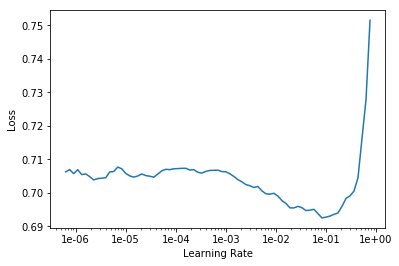

In [16]:
mdl.lr_find()
mdl.recorder.plot()

In [17]:
mdl.fit_one_cycle(5, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.647061,72102.406250,0.508226,00:46
1,0.613904,51058.582031,0.553511,00:45
2,0.547871,30543.367188,0.550592,00:45
3,0.419874,73126.304688,0.550250,00:45
4,0.329075,80067.578125,0.553980,00:45


In [18]:
preds = mdl.get_preds()

In [19]:
predictions, actuals = preds[0], preds[1]
predictions = np.array(predictions)[:,1]
actuals = np.array(actuals)
fpr, tpr, thresholds = metrics.roc_curve(actuals, predictions, pos_label=1)
metrics.auc(fpr, tpr)

0.5841802898849082